In [1]:
from IPython.display import Markdown, display
from typing import Callable, List, Dict, Optional
import matplotlib.pyplot as plt
import base64
from io import BytesIO


class DisplayCompetition:
    styles = {
        'h1': 'background-color:#eef; color:#006; padding:20px; border-radius:10px;',
        'h2': 'background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;',
        'h3': 'background-color:#fff; color:#006; padding-left:20px; clear:both;',
        'h4': 'background-color:#fff; color:#006; padding-left:20px; clear:both;',
        'p': '',
        '.tbl_selected': 'background-color:#fa9',
        '.column': 'padding:20px; margin:20px; box-shadow: 0 0 1em #006;',
    }

    def __init__(self):
        self.__in_section = False
        self.__html = ''

    def __getattr__(self, tag) -> Optional[Callable]:
        if tag in self.styles:
            def tag_generator(text):
                self._p(f'<{tag} style="{self.styles[tag]}">{text}</{tag}>')
            return tag_generator

    def fig(self, fig: plt.figure) -> None:
        tmpfile = BytesIO()
        fig.savefig(tmpfile, format='png')
        plt.close(fig)
        encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
        self._p('<img src=\'data:image/png;base64,{}\'>'.format(encoded))

    def table(self, headings: List[str], data: Dict[str, List[str]], select: Optional[Callable] = None) -> None:
        if select is None:
            def select(x): return False

        html = '<table>'
        html += '<tr><td></td><th>' + '</th><th>'.join(headings) + '</th></tr>'

        for name, row in data.items():
            if select is None:
                html += '<tr><th>' + name + '</th>' + ''.join(f'<td>{item}</td>' for item in row) + '</tr>'
            else:
                html += '<tr><th>' + name + '</th>' + ''.join(f'<td style="' + (self.styles['.tbl_selected'] if select(item) else '') + f'">{item}</td>' for item in row) + '</tr>'
        html += '<table>'
        self._p(html)

    def table2level(self, headings: Dict[str, List[str]], row_headings: Dict[str, List[str]], data: List, select: Optional[Callable] = None) -> None:
        if select is None:
            def select(x): return False

        html = '<table>'

        # Headers
        h1line = ''
        h2line = ''
        for h1, h2s in headings.items():
            h1line += f'<th colspan="{len(h2s)}">{h1}</th>'
            h2line += '<th>' + '</th><th>'.join(h2s) + '</th>'
        html += f'<tr><td></td><td></td>{h1line}</tr>'
        html += f'<tr><td></td><td></td>{h2line}</tr>'

        # Row headers and data
        rows = ''
        rn = 0
        for h1, h2s in row_headings.items():
            for n, h2 in enumerate(h2s):
                rows += '<tr>'
                if n == 0:
                    rows += f'<th rowspan="{len(h2s)}">{h1}</th>'
                rows += f'<th>{h2}</th><td>' + '</td><td>'.join(data[rn]) + '</td></tr>'
                rn += 1
        html += rows
        html += '<table>'
        self._p(html)

    def ol(self, data: List[str]) -> None:
        html = '<ol>'
        if len(data):
            html += '<li>' + ('</li><li>'.join(data)) + '</li>'
        html += '</ol>'
        self._p(html)
        
    def ul(self, data: List[str]) -> None:
        html = '<ul>'
        if len(data):
            html += '<li>' + ('</li><li>'.join(data)) + '</li>'
        html += '</ul>'
        self._p(html)
        
    def start_section(self, style=None) -> None:
        self.__html = f'<div style="{self.styles[style]}">' if style in self.styles else '<div>'
        self.__in_section = True

    def stop_section(self) -> None:
        self.__in_section = False
        self.__html += '<div>'
        self._p()

    def _p(self, html: Optional[str] = None) -> None:
        if self.__in_section:
            self.__html += html
        elif html is None:
            self._p(self.__html)
            self.__html = ''
        else:
            display(Markdown(html))

dc = DisplayCompetition()

In [2]:
dc.h1('1. 首先让我们读取数据集')

<h1 style="background-color:#eef; color:#006; padding:20px; border-radius:10px;">1. 首先让我们读取数据集</h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 14})


TRAIN_CSV = 'data/Mini-Course Sales/train.csv'
TEST_CSV = 'data/Mini-Course Sales/test.csv'

train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
validation_year = 2000 # non-existing year or the year we use in validation
train_df.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [4]:
dc.h1('2. 简单问题与答案')

dc.h2('2.1 我们在训练和测试数据帧中有哪些国家？它们有区别吗？')
dc.p('在训练集中，我们有以下国家: ' + ', '.join(train_df.country.unique()))
dc.p('在测试集中，我们有以下国家: ' + ', '.join(test_df.country.unique()))
dc.p('<b>结论：</b>我们有5个不同的国家，训练集和测试集是相同的。注意，它们位于世界的完全不同部分，所以它们有不同的节日等。')

dc.h2('2.2 我们在训练和测试数据帧中有哪些商店？它们有区别吗？')
dc.p('在训练集中，我们有以下商店: ' + ', '.join(train_df.store.unique()))
dc.p('在测试集中，我们有以下商店: ' + ', '.join(test_df.store.unique()))
dc.p('<b>结论：</b>我们有3个不同的商店，训练集和测试集是相同的。')

dc.h2('2.3 我们在训练和测试数据帧中有哪些产品？它们有区别吗？')
dc.p('在训练集中，我们有以下产品: ' + ', '.join(train_df['product'].unique()))
dc.p('在测试集中，我们有以下产品: ' + ', '.join(test_df['product'].unique()))
dc.p('<b>结论：</b>我们有5个不同的产品，训练集和测试集是相同的。')

dc.h2('2.4 每个商店都在每个国家运营吗？')
dc.p('在训练集中，我们有国家/商店组合: <br/>' + ', '.join((train_df.country + '/' + train_df.store).unique()))
dc.p('在测试集中，我们有国家/商店组合: <br/>' + ', '.join((test_df.country + '/' + test_df.store).unique()))
dc.p('<b>结论：</b>是的，每个商店都在每个国家运营，这对于训练集和测试集都是如此。')

dc.h2('2.5 每个国家的每家商店都提供相同的产品吗？')
train_num = len((train_df.country + '/' + train_df.store + '/' +  train_df['product']).unique())
test_num = len((test_df.country + '/' + test_df.store + '/' +  test_df['product']).unique())
dc.p(f'在训练集中，我们有{train_num}个不同的国家/商店/产品三重组合。')
dc.p(f'在测试集中，我们有{test_num}个不同的国家/商店/产品三重组合。')
dc.p('<b>结论：</b>因为5*3*5=75，是的，每家商店的产品种类是相同的!')

dc.h2('2.6 我们在每个国家/商店组合和每个数据帧中有什么时间间隔？')
dc.h3('训练数据帧：')
dc._p(train_df.groupby(by=['country', 'store']).date.agg(('min', 'max')).to_html())
dc.h3('测试数据帧：')
dc._p(test_df.groupby(by=['country', 'store']).date.agg(('min', 'max')).to_html())
dc.p('<b>结论：</b> 训练开始于2017-01-01并结束于2021-12-31，测试开始于2022-01-01并结束于2022-12-31。')

<h1 style="background-color:#eef; color:#006; padding:20px; border-radius:10px;">2. 简单问题与答案</h1>

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">2.1 我们在训练和测试数据帧中有哪些国家？它们有区别吗？</h2>

<p style="">在训练集中，我们有以下国家: Argentina, Canada, Estonia, Japan, Spain</p>

<p style="">在测试集中，我们有以下国家: Argentina, Canada, Estonia, Japan, Spain</p>

<p style=""><b>结论：</b>我们有5个不同的国家，训练集和测试集是相同的。注意，它们位于世界的完全不同部分，所以它们有不同的节日等。</p>

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">2.2 我们在训练和测试数据帧中有哪些商店？它们有区别吗？</h2>

<p style="">在训练集中，我们有以下商店: Kaggle Learn, Kaggle Store, Kagglazon</p>

<p style="">在测试集中，我们有以下商店: Kaggle Learn, Kaggle Store, Kagglazon</p>

<p style=""><b>结论：</b>我们有3个不同的商店，训练集和测试集是相同的。</p>

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">2.3 我们在训练和测试数据帧中有哪些产品？它们有区别吗？</h2>

<p style="">在训练集中，我们有以下产品: Using LLMs to Improve Your Coding, Using LLMs to Train More LLMs, Using LLMs to Win Friends and Influence People, Using LLMs to Win More Kaggle Competitions, Using LLMs to Write Better</p>

<p style="">在测试集中，我们有以下产品: Using LLMs to Improve Your Coding, Using LLMs to Train More LLMs, Using LLMs to Win Friends and Influence People, Using LLMs to Win More Kaggle Competitions, Using LLMs to Write Better</p>

<p style=""><b>结论：</b>我们有5个不同的产品，训练集和测试集是相同的。</p>

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">2.4 每个商店都在每个国家运营吗？</h2>

<p style="">在训练集中，我们有国家/商店组合: <br/>Argentina/Kaggle Learn, Argentina/Kaggle Store, Argentina/Kagglazon, Canada/Kaggle Learn, Canada/Kaggle Store, Canada/Kagglazon, Estonia/Kaggle Learn, Estonia/Kaggle Store, Estonia/Kagglazon, Japan/Kaggle Learn, Japan/Kaggle Store, Japan/Kagglazon, Spain/Kaggle Learn, Spain/Kaggle Store, Spain/Kagglazon</p>

<p style="">在测试集中，我们有国家/商店组合: <br/>Argentina/Kaggle Learn, Argentina/Kaggle Store, Argentina/Kagglazon, Canada/Kaggle Learn, Canada/Kaggle Store, Canada/Kagglazon, Estonia/Kaggle Learn, Estonia/Kaggle Store, Estonia/Kagglazon, Japan/Kaggle Learn, Japan/Kaggle Store, Japan/Kagglazon, Spain/Kaggle Learn, Spain/Kaggle Store, Spain/Kagglazon</p>

<p style=""><b>结论：</b>是的，每个商店都在每个国家运营，这对于训练集和测试集都是如此。</p>

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">2.5 每个国家的每家商店都提供相同的产品吗？</h2>

<p style="">在训练集中，我们有75个不同的国家/商店/产品三重组合。</p>

<p style="">在测试集中，我们有75个不同的国家/商店/产品三重组合。</p>

<p style=""><b>结论：</b>因为5*3*5=75，是的，每家商店的产品种类是相同的!</p>

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">2.6 我们在每个国家/商店组合和每个数据帧中有什么时间间隔？</h2>

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">训练数据帧：</h3>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>min</th>
      <th>max</th>
    </tr>
    <tr>
      <th>country</th>
      <th>store</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">Argentina</th>
      <th>Kagglazon</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Canada</th>
      <th>Kagglazon</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Estonia</th>
      <th>Kagglazon</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Japan</th>
      <th>Kagglazon</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Spain</th>
      <th>Kagglazon</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2017-01-01</td>
      <td>2021-12-31</td>
    </tr>
  </tbody>
</table>

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">测试数据帧：</h3>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>min</th>
      <th>max</th>
    </tr>
    <tr>
      <th>country</th>
      <th>store</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">Argentina</th>
      <th>Kagglazon</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Canada</th>
      <th>Kagglazon</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Estonia</th>
      <th>Kagglazon</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Japan</th>
      <th>Kagglazon</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Spain</th>
      <th>Kagglazon</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>2022-01-01</td>
      <td>2022-12-31</td>
    </tr>
  </tbody>
</table>

<p style=""><b>结论：</b> 训练开始于2017-01-01并结束于2021-12-31，测试开始于2022-01-01并结束于2022-12-31。</p>

<h1 style="background-color:#eef; color:#006; padding:20px; border-radius:10px;">3. 时间序列比较</h1>

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">3.1. 相同的国家="Argentina" 和商店="Kagglazon"，但是不同的产品</h2>

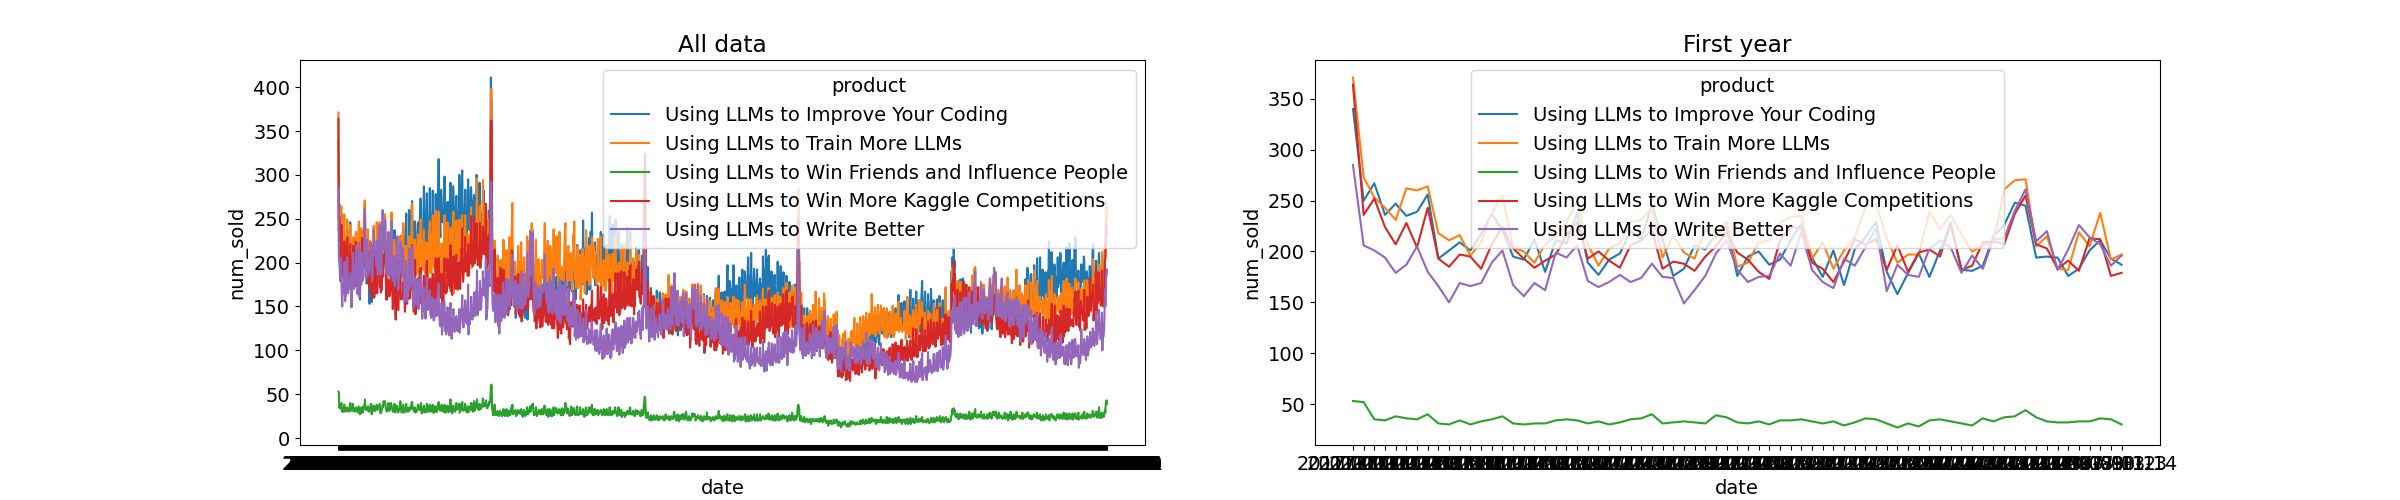

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">3.2. 相同的产品="Using LLMs to Improve Your Coding" 和商店="Kagglazon"，但是不同的国家</h2>

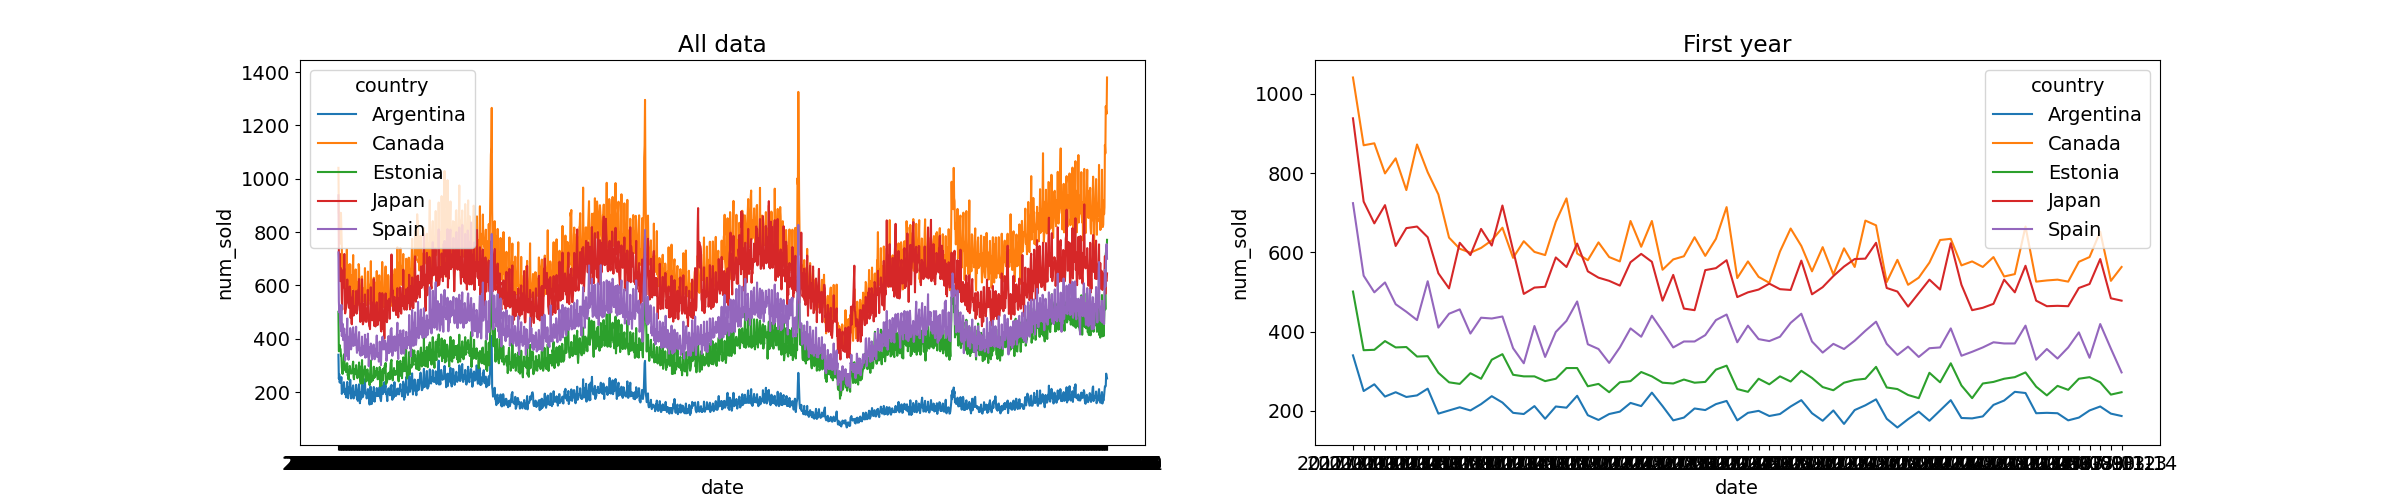

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">3.3. 相同的国家="Argentina" 和产品="Using LLMs to Improve Your Coding"，但是不同的商店</h2>

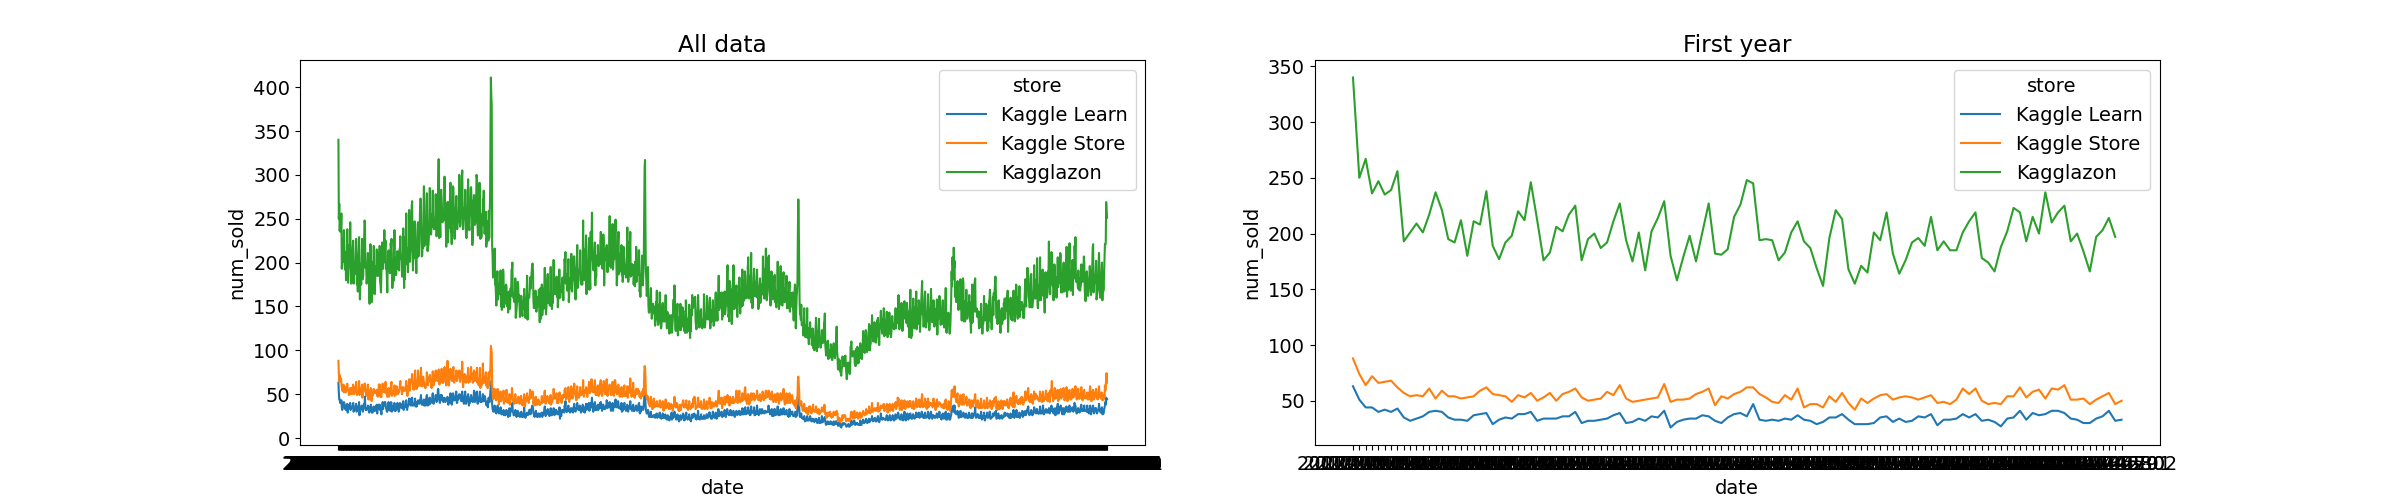

<p style=""><b>结论：</b> 我们确实看到了趋势以及循环模式。因此，SARIMA等模型应该适合描述这种情况。</p>

In [5]:
product = 'Using LLMs to Improve Your Coding'
country = 'Argentina'
store = 'Kagglazon'

dc.h1('3. 时间序列比较')

dc.h2(f'3.1. 相同的国家="{country}" 和商店="{store}"，但是不同的产品')
df = train_df[(train_df.country == country)&(train_df.store == store)]
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(24, 5)
sns.lineplot(data=df, x='date', y='num_sold', hue='product', ax=ax[0])
sns.lineplot(data=df[:365], x='date', y='num_sold', hue='product', ax=ax[1])
ax[0].set_title('All data')
ax[1].set_title('First year')
dc.fig(fig)

dc.h2(f'3.2. 相同的产品="{product}" 和商店="{store}"，但是不同的国家')
df = train_df[(train_df['product'] == product)&(train_df.store == store)]
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(24, 5)
sns.lineplot(data=df, x='date', y='num_sold', hue='country', ax=ax[0])
sns.lineplot(data=df[:365], x='date', y='num_sold', hue='country', ax=ax[1])
ax[0].set_title('All data')
ax[1].set_title('First year')
dc.fig(fig)

dc.h2(f'3.3. 相同的国家="{country}" 和产品="{product}"，但是不同的商店')
df = train_df[(train_df.country == country)&(train_df['product'] == product)]
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(24, 5)
sns.lineplot(data=df, x='date', y='num_sold', hue='store', ax=ax[0])
sns.lineplot(data=df[:365], x='date', y='num_sold', hue='store', ax=ax[1])
ax[0].set_title('All data')
ax[1].set_title('First year')
dc.fig(fig)

dc.p('<b>结论：</b> 我们确实看到了趋势以及循环模式。因此，SARIMA等模型应该适合描述这种情况。')


D:\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<h1 style="background-color:#eef; color:#006; padding:20px; border-radius:10px;">4. 分数分解</h1>

<p style="">我们计算在不同列上售出的产品比率的时间依赖性</p>

<p style="">看起来，产品有周期性，国家每年都有逐步的依赖性，而商店则是恒定的</p>

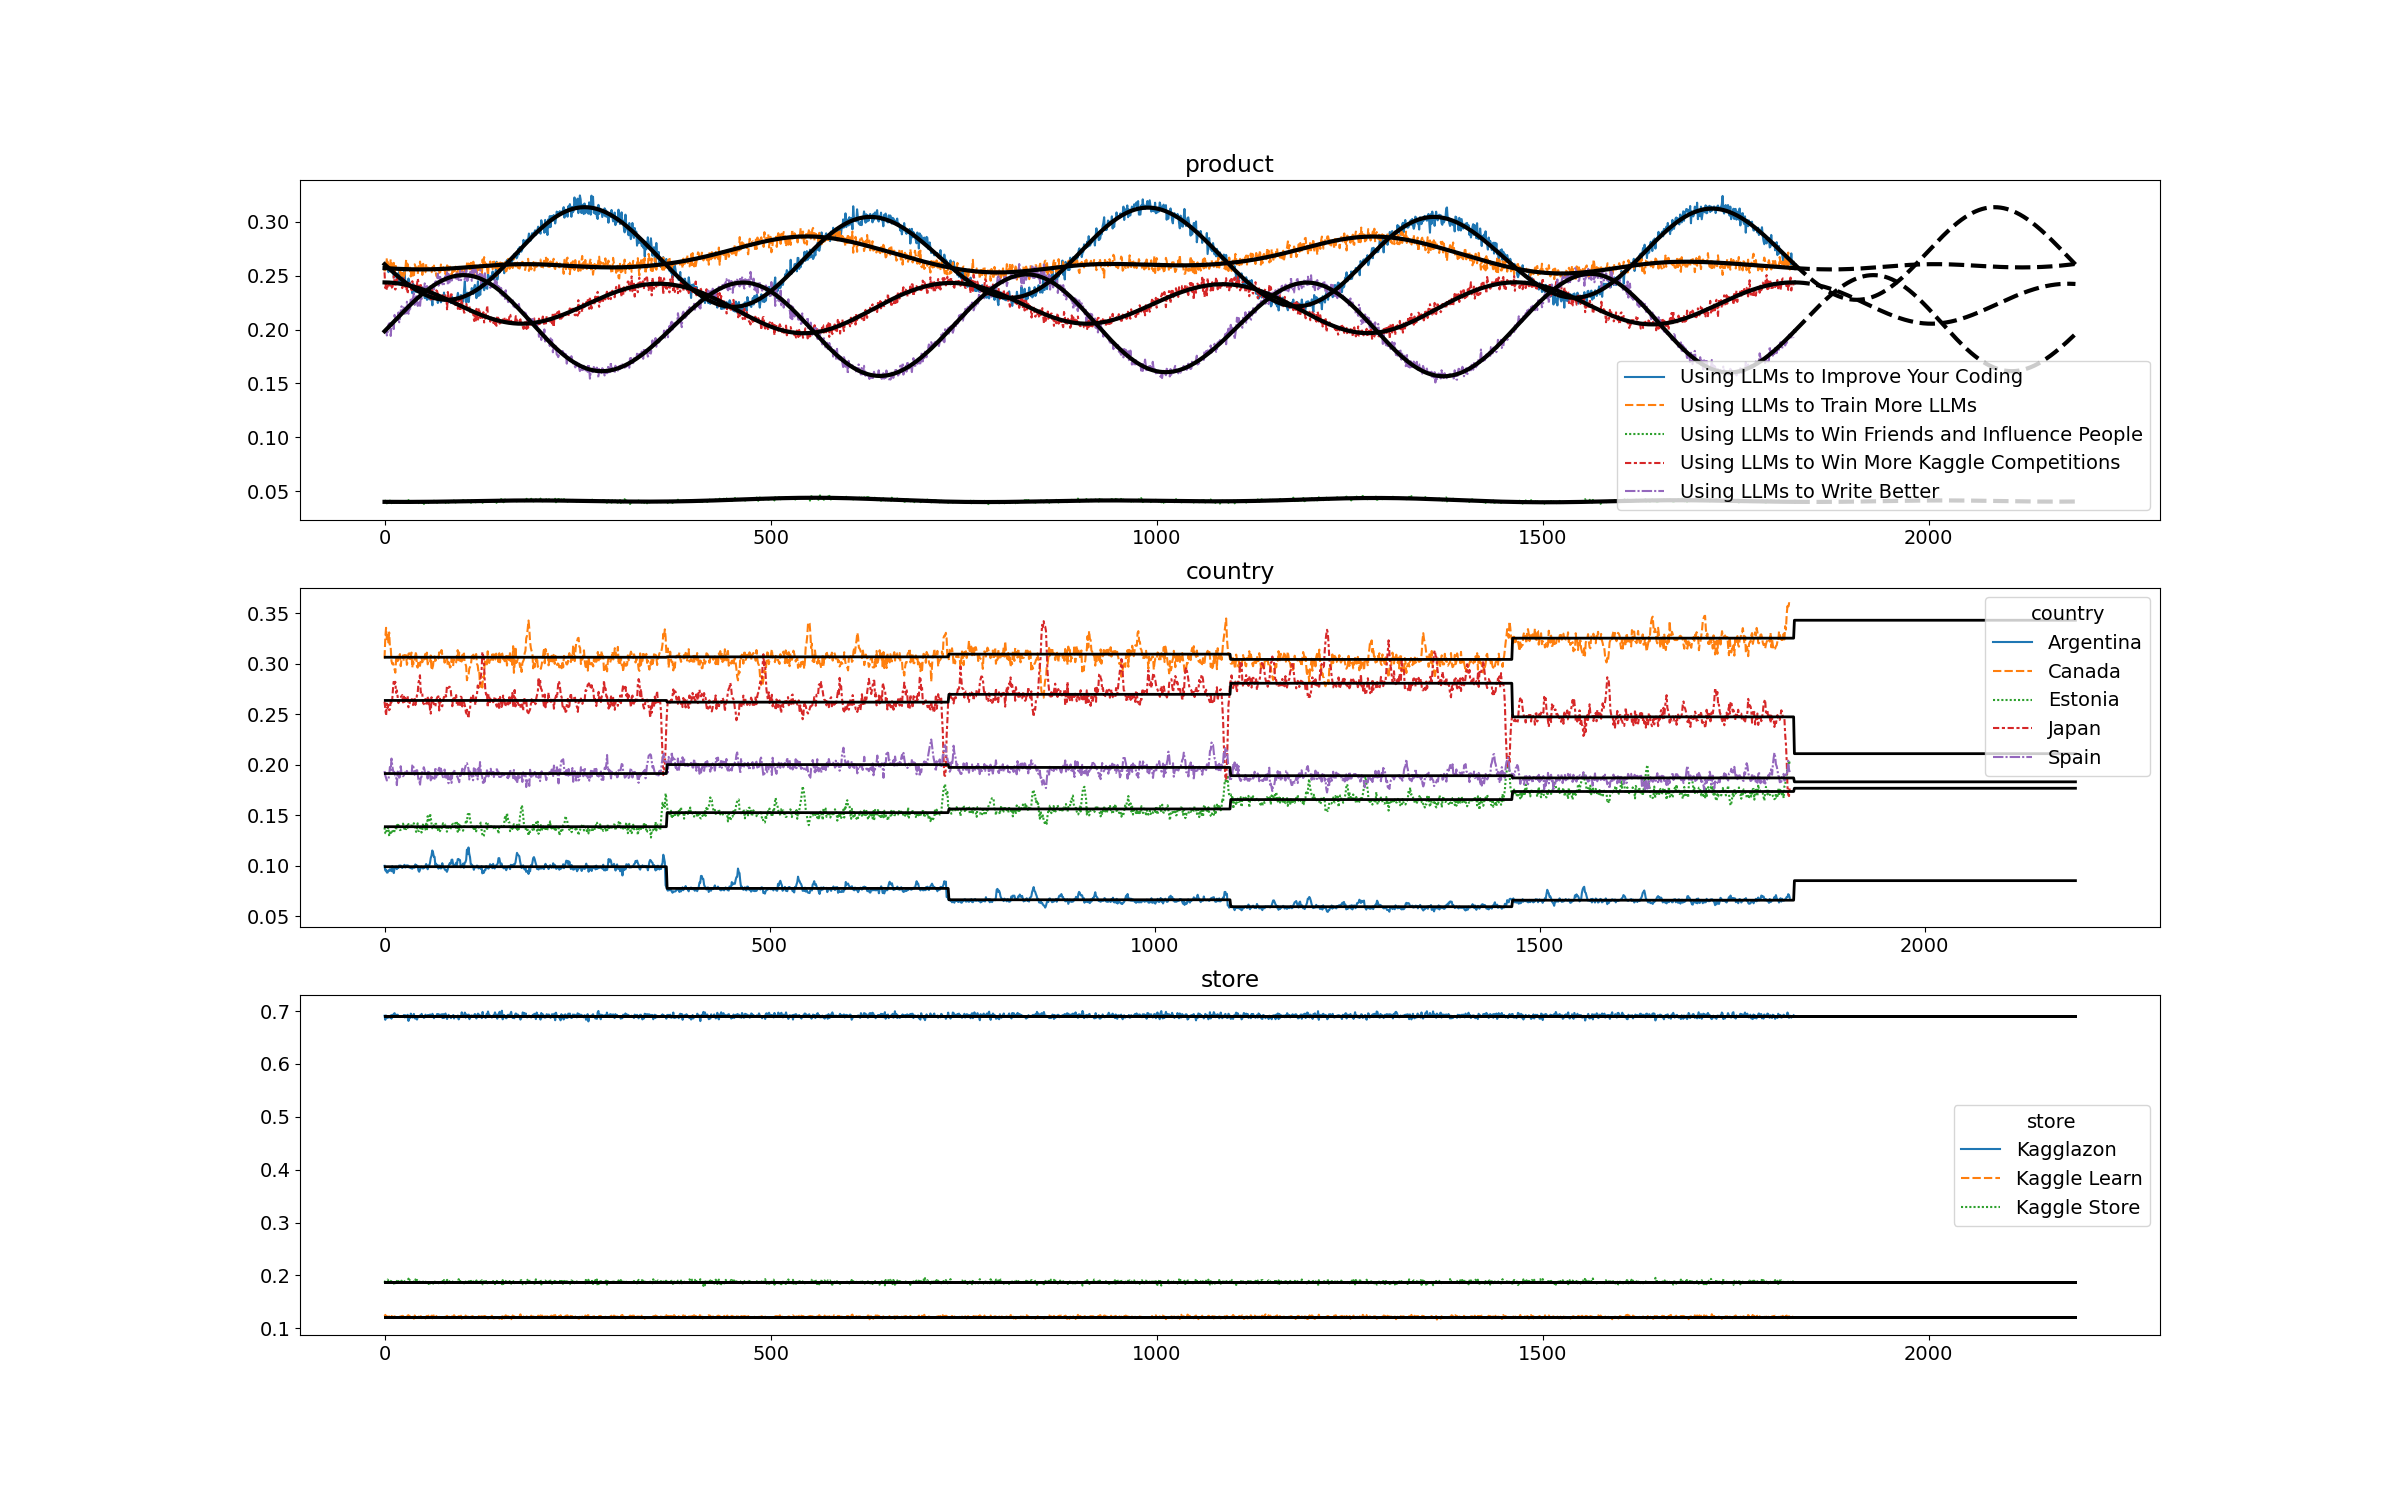

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">4.1. 我们引入几个因子来分解时间序列</h2>

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">4.1.1. 相对GDP</h3>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>2017</th>
      <th>2018</th>
      <th>2019</th>
      <th>2020</th>
      <th>2021</th>
      <th>2022</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Argentina</th>
      <td>0.099274</td>
      <td>0.077784</td>
      <td>0.066531</td>
      <td>0.059671</td>
      <td>0.066117</td>
      <td>0.085457</td>
    </tr>
    <tr>
      <th>Canada</th>
      <td>0.306587</td>
      <td>0.306963</td>
      <td>0.309657</td>
      <td>0.304448</td>
      <td>0.325473</td>
      <td>0.343217</td>
    </tr>
    <tr>
      <th>Estonia</th>
      <td>0.138844</td>
      <td>0.152769</td>
      <td>0.156414</td>
      <td>0.165711</td>
      <td>0.173705</td>
      <td>0.176912</td>
    </tr>
    <tr>
      <th>Japan</th>
      <td>0.263819</td>
      <td>0.262142</td>
      <td>0.269872</td>
      <td>0.280831</td>
      <td>0.247575</td>
      <td>0.211147</td>
    </tr>
    <tr>
      <th>Spain</th>
      <td>0.191477</td>
      <td>0.200342</td>
      <td>0.197526</td>
      <td>0.189340</td>
      <td>0.187131</td>
      <td>0.183266</td>
    </tr>
  </tbody>
</table>

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">4.1.2. 相对产品频谱过滤</h3>

<p style="">我们抑制所有高频谱成分</p>

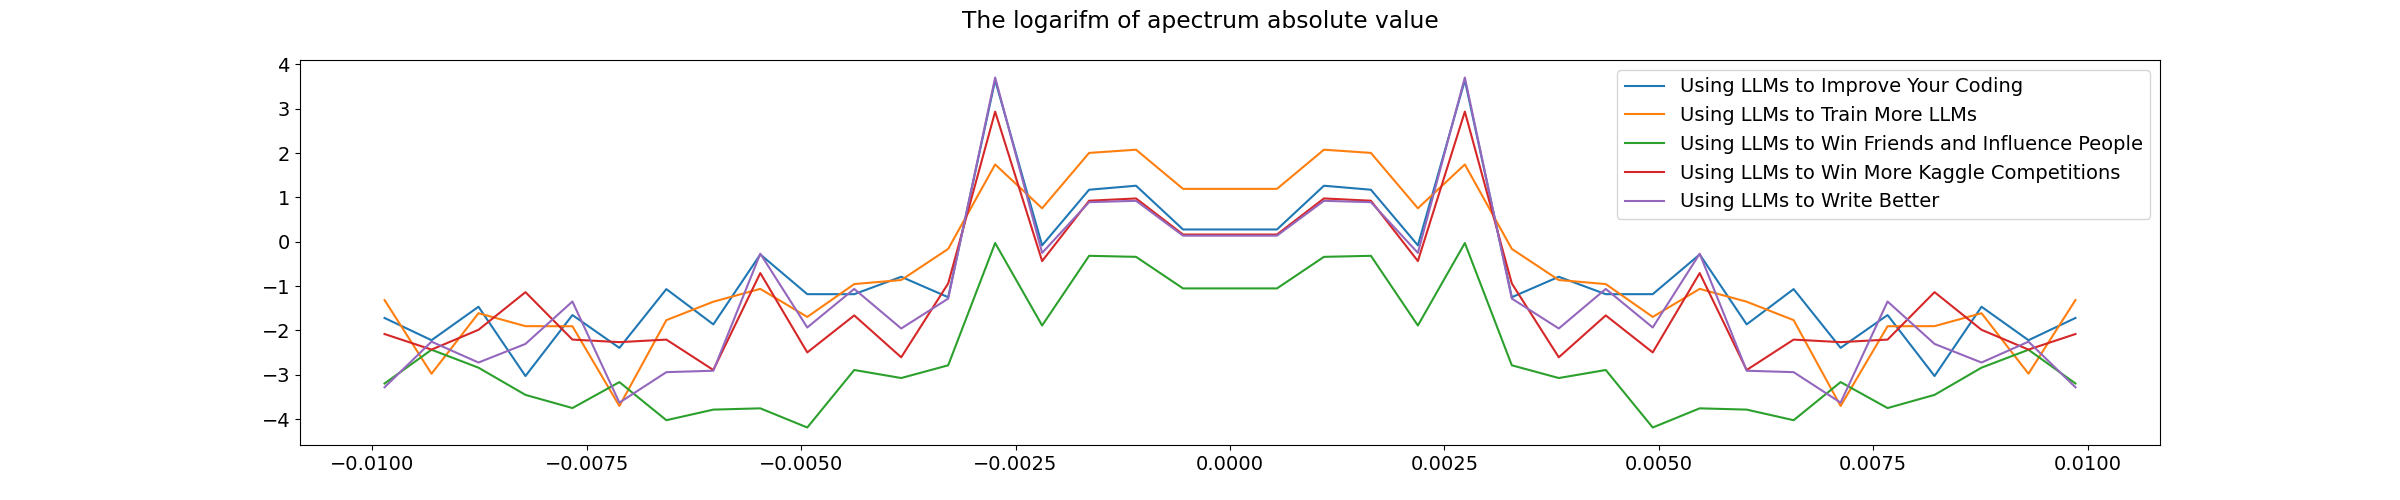

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">4.1.3. 按商店简单平均</h3>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
    <tr>
      <th>store</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Kagglazon</th>
      <td>0.690899</td>
    </tr>
    <tr>
      <th>Kaggle Learn</th>
      <td>0.121572</td>
    </tr>
    <tr>
      <th>Kaggle Store</th>
      <td>0.187530</td>
    </tr>
  </tbody>
</table>

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">4.2. 现在，让我们将所有因子放在一个数据框中</h2>

In [6]:
import requests
from numpy.fft import fft, ifft, fftshift, fftfreq

fft_filter_width = 5
fft_prediction_length = 365

fig, ax = plt.subplots(nrows=3)
fig.set_size_inches(24,15)
sold_fractions = {}
for n, column in enumerate(['product', 'country', 'store']):
    ax[n].set_title(column)
    sold_per_column = train_df.groupby(['date', column])["num_sold"].sum().reset_index().pivot(index="date", columns=column, values='num_sold').reset_index(drop=True)
    sold_fractions[column] = sold_per_column.divide(sold_per_column.sum(axis=1), axis=0)
    sns.lineplot(data=sold_fractions[column], ax=ax[n])

# GDP
def get_gdp_per_capita(country,year):
    alpha3 = {'Argentina':'ARG', 'Canada':'CAN', 'Estonia':'EST', 'Japan':'JPN', 'Spain':'ESP'}
    url="https://api.worldbank.org/v2/country/{0}/indicator/NY.GDP.PCAP.CD?date={1}&format=json".format(alpha3[country],year)
    response = requests.get(url).json()
    return response[1][0]['value']

gdp = np.array([[get_gdp_per_capita(country, year) for year in range(2017, 2023)] for country in train_df.country.unique()])
rel_gdp_df = pd.DataFrame(gdp / np.sum(gdp, axis=0), index=train_df.country.unique(), columns=range(2017,2023))

for n in range(5):
    ax[1].plot(np.cumsum([1, 365] * 6), np.repeat(rel_gdp_df.iloc[n].to_numpy(), 2), 'k', linewidth=2)    

# FFT filtering & time shift
product_ratios = {}
for n in range(5):
    s = sold_fractions['product'].iloc[:, n].to_numpy()
    s_f0 = fft(s)
    s_f = s_f0.copy()
    s_f[fft_filter_width+1:-fft_filter_width] = 0
    s_f[2*fft_filter_width] = s_f0[2*fft_filter_width]
    s_f[-2*fft_filter_width] = s_f0[-2*fft_filter_width]
    s_filt = ifft(s_f)
    
    s_predicted = ifft( np.exp(2j * np.pi * fftfreq(len(s)) * len(s)) * s_f)[:fft_prediction_length]
    product_ratios[sold_fractions['product'].columns[n]] = np.real(np.concatenate((s_filt, s_predicted)))
    
    ax[0].plot(s_filt, 'k', linewidth=3)
    ax[0].plot(range(len(s), len(s) + fft_prediction_length), s_predicted, 'k--', linewidth=3)
    
ax[0].legend()

spectrum = plt.figure(figsize=(24, 5))
spectrum.suptitle('The logarifm of apectrum absolute value')
for n in range(5):
    s = sold_fractions['product'].iloc[:, n].to_numpy()
    freqs = fftshift(fftfreq(len(s)))
    mask = (abs(freqs) < 0.01) & (abs(freqs)>0)
    plt.plot(freqs[mask], np.log(abs(fftshift(fft(s))[mask])), label=sold_fractions['product'].columns[n])
plt.legend()

# Simple averaging
store_means = sold_fractions['store'].mean()
for n in range(3):
    ax[2].plot((0, 365*6), (store_means, store_means), 'k', linewidth=2)

dc.h1('4. 分数分解')
dc.p('我们计算在不同列上售出的产品比率的时间依赖性')
dc.p('看起来，产品有周期性，国家每年都有逐步的依赖性，而商店则是恒定的')
dc.fig(fig)

dc.h2('4.1. 我们引入几个因子来分解时间序列')

dc.h3('4.1.1. 相对GDP')
dc._p(rel_gdp_df.to_html())

dc.h3('4.1.2. 相对产品频谱过滤')
dc.p('我们抑制所有高频谱成分')
dc.fig(spectrum)

dc.h3('4.1.3. 按商店简单平均')
dc._p(sold_fractions['store'].mean().to_frame().to_html())

dc.h2('4.2. 现在，让我们将所有因子放在一个数据框中')

In [7]:
from sklearn.linear_model import Ridge

val_df = train_df[pd.DatetimeIndex(train_df.date).year == validation_year].copy()

df = pd.concat([train_df, test_df])
df.date = pd.DatetimeIndex(df.date)
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.weekday
df['dayofyear'] = df['date'].dt.dayofyear
df['daynum'] = (df.date - df.date.iloc[0]).dt.days
df['weeknum'] = df['daynum'] // 7
df['month'] = df.date.dt.month

df.loc[df['date'].dt.year == validation_year, 'num_sold'] = None

countries = df.country.unique()
stores = df.store.unique()
products = df['product'].unique()
years = df.year.unique()

df[['gdp', 'product_ratio', 'store_ratio']] = 0

# GDP
gdp_x = []
gdp_y = []
for c, country in enumerate(countries):
    for y, year in enumerate(years):
        sold = df.loc[(df.year == year) & (df.country == country)].num_sold.sum()
        gdp_x.append([gdp[c][y], ])
        gdp_y.append(sold)
reg = Ridge(fit_intercept=False).fit(np.array(gdp_x)[~np.isnan(gdp_y)], np.array(gdp_y)[~np.isnan(gdp_y)])
gdp_y = reg.predict(gdp_x)

n = 0
for c, country in enumerate(countries):
    for y, year in enumerate(years):
        df.loc[(df.year == year) & (df.country == country), 'gdp'] = gdp[c][y]
        df.loc[(df.year == year) & (df.country == country), 'gdp_ratio'] = gdp_y[n]
        n += 1
        
# Product periodicity
for product in products:
    for country in countries:
        for store in stores:
            df.loc[(df['product'] == product) & (df.country == country) & (df.store == store), 'product_ratio'] = product_ratios[product]
    
# Store coefficients
for store in stores:
    df.loc[df.store == store, 'store_ratio'] = sold_fractions['store'].mean()[store]
    
# The total ratio taking into account all factors
df['ratio'] = df['gdp_ratio'] * df['product_ratio'] * df['store_ratio']

# The total sold items taking into account all factors
df['total'] = df['num_sold'] / df['ratio']


<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">4.3. 重复时间序列比较，但使用新引入的 `total` 列代替 `num_sold`</h2>

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">4.3.1. 同样的 `country`="Argentina" 和 `store`="Kagglazon", 但是不同的产品</h3>

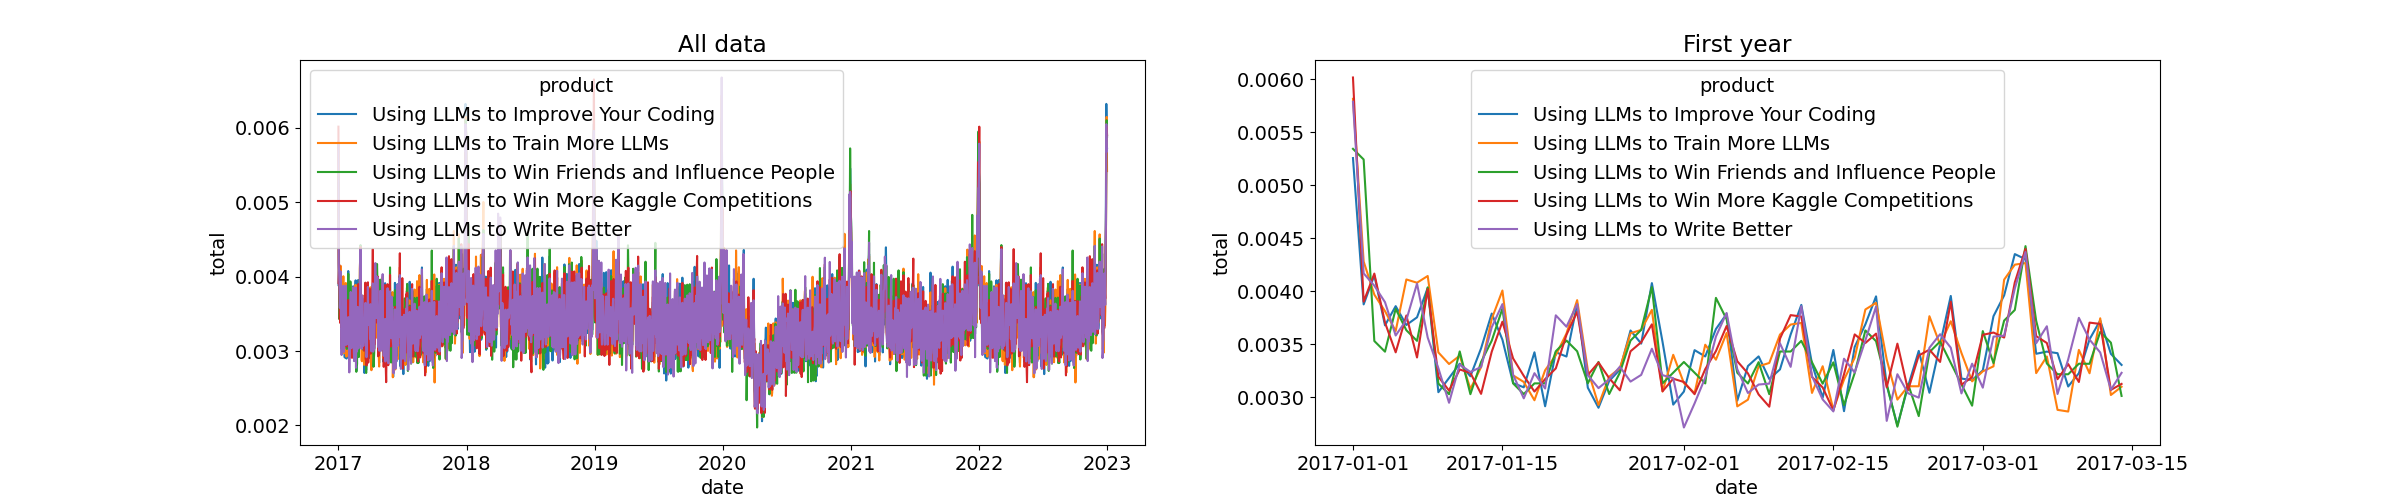

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">4.3.2. 同样的 `product`="Using LLMs to Improve Your Coding" 和 `store`="Kagglazon", 但是不同的国家</h3>

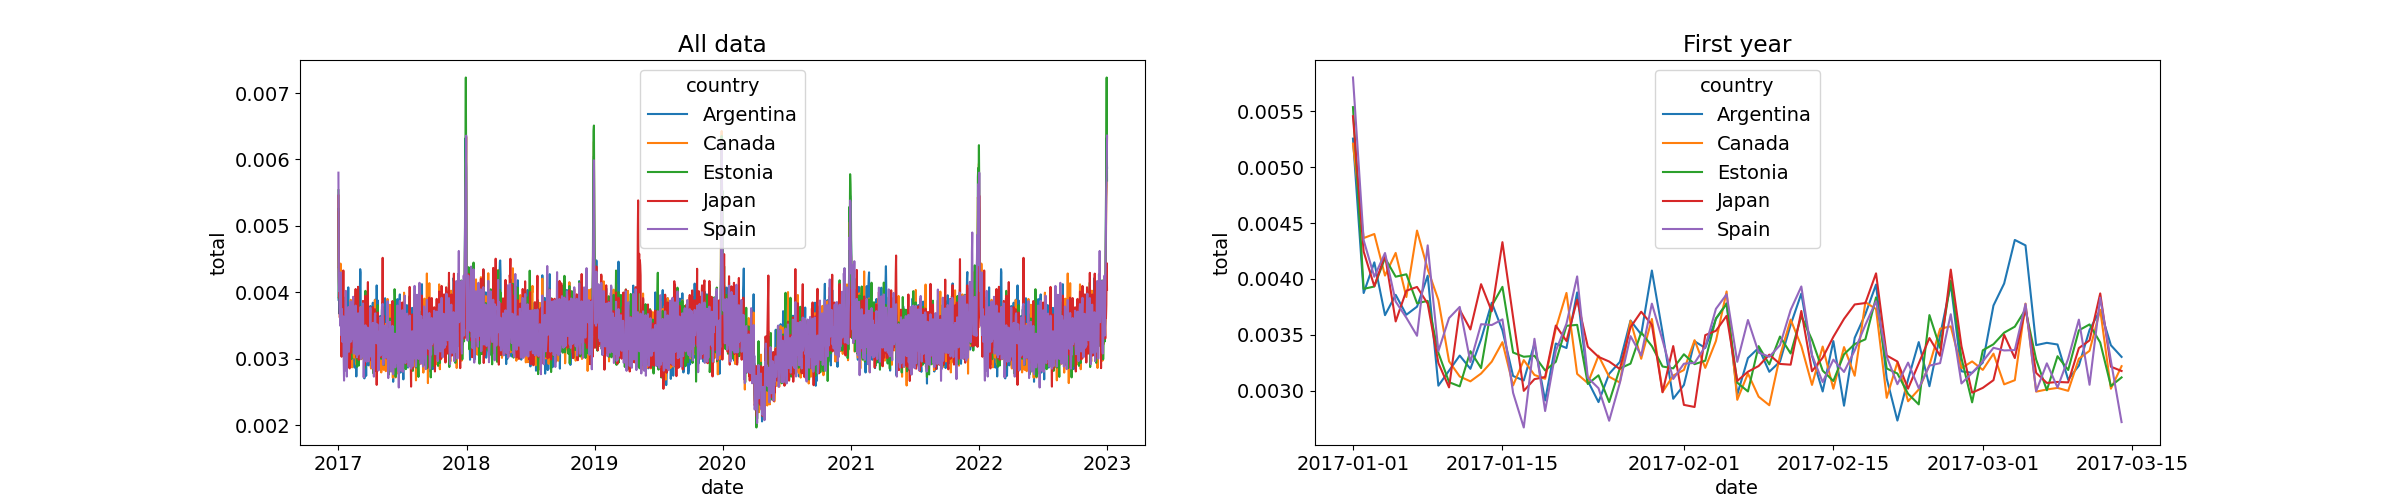

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">4.3.3. 同样的 `country`="Argentina" 和 `product`="Using LLMs to Improve Your Coding", 但是不同的商店</h3>

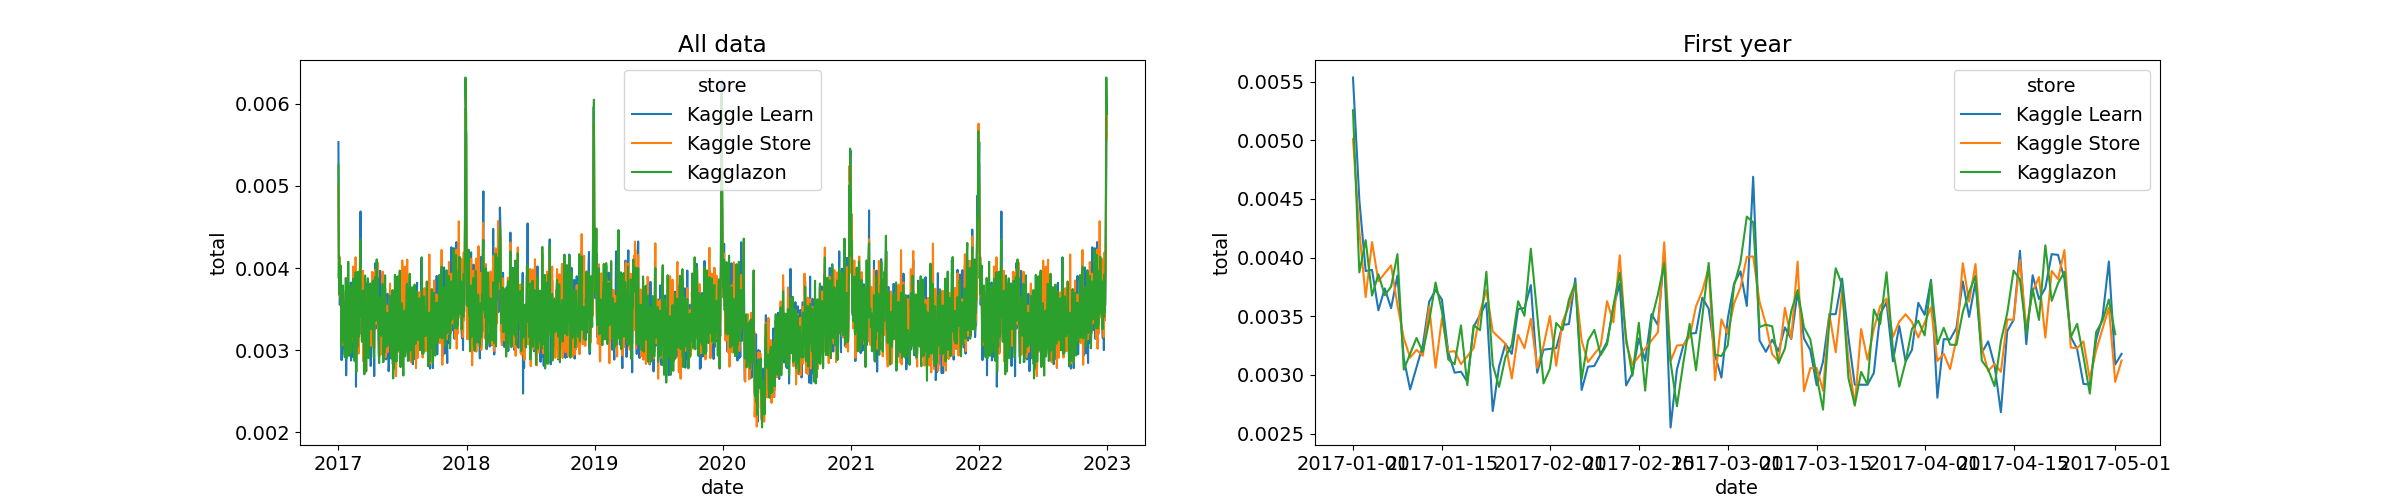

<p style=""><b>结论：</b> 我们可以看到现在的国家/产品/商店不再影响我们的曲线。</p>

In [8]:
product = 'Using LLMs to Improve Your Coding'
country = 'Argentina'
store = 'Kagglazon'

dc.h2('4.3. 重复时间序列比较，但使用新引入的 `total` 列代替 `num_sold`')

dc.h3(f'4.3.1. 同样的 `country`="{country}" 和 `store`="{store}", 但是不同的产品')
data = df[(df.country == country)&(df.store == store)]
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(24, 5)
sns.lineplot(data=data, x='date', y='total', hue='product', ax=ax[0])
sns.lineplot(data=data[:365], x='date', y='total', hue='product', ax=ax[1])
ax[0].set_title('All data')
ax[1].set_title('First year')
dc.fig(fig)

dc.h3(f'4.3.2. 同样的 `product`="{product}" 和 `store`="{store}", 但是不同的国家')
data = df[(df['product'] == product)&(df.store == store)]
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(24, 5)
sns.lineplot(data=data, x='date', y='total', hue='country', ax=ax[0])
sns.lineplot(data=data[:365], x='date', y='total', hue='country', ax=ax[1])
ax[0].set_title('All data')
ax[1].set_title('First year')
dc.fig(fig)

dc.h3(f'4.3.3. 同样的 `country`="{country}" 和 `product`="{product}", 但是不同的商店')
data = df[(df.country == country)&(df['product'] == product)]
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(24, 5)
sns.lineplot(data=data, x='date', y='total', hue='store', ax=ax[0])
sns.lineplot(data=data[:365], x='date', y='total', hue='store', ax=ax[1])
ax[0].set_title('All data')
ax[1].set_title('First year')
dc.fig(fig)

dc.p('<b>结论：</b> 我们可以看到现在的国家/产品/商店不再影响我们的曲线。')

In [9]:
from scipy.stats import ks_2samp

ks_countries = {c2:['{:.2e}'.format(ks_2samp(data1=df[df.country==c1].total, data2=df[df.country==c2].total).pvalue) for c1 in countries] for c2 in countries}
ks_stores = {s2:['{:.2e}'.format(ks_2samp(data1=df[df.store==s1].total, data2=df[df.store==s2].total).pvalue) for s1 in stores] for s2 in stores}
ks_products = {p2:['{:.2e}'.format(ks_2samp(data1=df[df['product']==p1].total, data2=df[df['product']==p2].total).pvalue) for p1 in products] for p2 in products}

dc.h2('4.4. 我们执行 Kolmogorov-Smirnov 测试，以查看 `total` 值是否取决于国家/商店/产品')
dc.p('此测试的零假设是没有依赖关系。以下是相应的 p-value 表格')

dc.h3('国家')
dc.table(countries, ks_countries, lambda x: float(x) < 0.01)
dc.h3('商店')
dc.table(stores, ks_stores, lambda x: float(x) < 0.01)
dc.h3('产品')
dc.table(products, ks_products, lambda x: float(x) < 0.01)

dc.p('<b>结论：</b> 仍然存在依赖关系！')


<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">4.4. 我们执行 Kolmogorov-Smirnov 测试，以查看 `total` 值是否取决于国家/商店/产品</h2>

<p style="">此测试的零假设是没有依赖关系。以下是相应的 p-value 表格</p>

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">国家</h3>

<table><tr><td></td><th>Argentina</th><th>Canada</th><th>Estonia</th><th>Japan</th><th>Spain</th></tr><tr><th>Argentina</th><td style="">1.00e+00</td><td style="background-color:#fa9">1.66e-10</td><td style="background-color:#fa9">6.93e-08</td><td style="background-color:#fa9">9.32e-38</td><td style="background-color:#fa9">7.95e-08</td></tr><tr><th>Canada</th><td style="background-color:#fa9">1.66e-10</td><td style="">1.00e+00</td><td style="">3.22e-02</td><td style="background-color:#fa9">1.07e-32</td><td style="background-color:#fa9">1.04e-05</td></tr><tr><th>Estonia</th><td style="background-color:#fa9">6.93e-08</td><td style="">3.22e-02</td><td style="">1.00e+00</td><td style="background-color:#fa9">1.11e-26</td><td style="">1.32e-02</td></tr><tr><th>Japan</th><td style="background-color:#fa9">9.32e-38</td><td style="background-color:#fa9">1.07e-32</td><td style="background-color:#fa9">1.11e-26</td><td style="">1.00e+00</td><td style="background-color:#fa9">3.66e-17</td></tr><tr><th>Spain</th><td style="background-color:#fa9">7.95e-08</td><td style="background-color:#fa9">1.04e-05</td><td style="">1.32e-02</td><td style="background-color:#fa9">3.66e-17</td><td style="">1.00e+00</td></tr><table>

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">商店</h3>

<table><tr><td></td><th>Kaggle Learn</th><th>Kaggle Store</th><th>Kagglazon</th></tr><tr><th>Kaggle Learn</th><td style="">1.00e+00</td><td style="background-color:#fa9">2.23e-05</td><td style="background-color:#fa9">2.98e-18</td></tr><tr><th>Kaggle Store</th><td style="background-color:#fa9">2.23e-05</td><td style="">1.00e+00</td><td style="background-color:#fa9">1.53e-07</td></tr><tr><th>Kagglazon</th><td style="background-color:#fa9">2.98e-18</td><td style="background-color:#fa9">1.53e-07</td><td style="">1.00e+00</td></tr><table>

<h3 style="background-color:#fff; color:#006; padding-left:20px; clear:both;">产品</h3>

<table><tr><td></td><th>Using LLMs to Improve Your Coding</th><th>Using LLMs to Train More LLMs</th><th>Using LLMs to Win Friends and Influence People</th><th>Using LLMs to Win More Kaggle Competitions</th><th>Using LLMs to Write Better</th></tr><tr><th>Using LLMs to Improve Your Coding</th><td style="">1.00e+00</td><td style="">8.87e-01</td><td style="background-color:#fa9">5.01e-33</td><td style="">4.99e-01</td><td style="">6.40e-01</td></tr><tr><th>Using LLMs to Train More LLMs</th><td style="">8.87e-01</td><td style="">1.00e+00</td><td style="background-color:#fa9">1.16e-30</td><td style="">7.51e-01</td><td style="">8.62e-01</td></tr><tr><th>Using LLMs to Win Friends and Influence People</th><td style="background-color:#fa9">5.01e-33</td><td style="background-color:#fa9">1.16e-30</td><td style="">1.00e+00</td><td style="background-color:#fa9">1.54e-28</td><td style="background-color:#fa9">7.21e-27</td></tr><tr><th>Using LLMs to Win More Kaggle Competitions</th><td style="">4.99e-01</td><td style="">7.51e-01</td><td style="background-color:#fa9">1.54e-28</td><td style="">1.00e+00</td><td style="">9.79e-01</td></tr><tr><th>Using LLMs to Write Better</th><td style="">6.40e-01</td><td style="">8.62e-01</td><td style="background-color:#fa9">7.21e-27</td><td style="">9.79e-01</td><td style="">1.00e+00</td></tr><table>

<p style=""><b>结论：</b> 仍然存在依赖关系！</p>

In [10]:
dc.h2('4.5. 我们将一周的某一天作为一个额外的因素进行研究')
dc.ol(['我们为每个星期、每个工作日和每个国家计算 sum(num_sold)',
       '对于每一周，我们都计算每个工作日售出的商品的比率',
       '对于每个国家，我们都绘制每个比率对于周数的依赖关系',
       '我们为每个国家和每个工作日计算中位数的比率，并放入一个单独的表格'])

<h2 style="background-color:#fff; color:#006; padding:20px; border-bottom:solid 2px #006;">4.5. 我们将一周的某一天作为一个额外的因素进行研究</h2>

<ol><li>我们为每个星期、每个工作日和每个国家计算 sum(num_sold)</li><li>对于每一周，我们都计算每个工作日售出的商品的比率</li><li>对于每个国家，我们都绘制每个比率对于周数的依赖关系</li><li>我们为每个国家和每个工作日计算中位数的比率，并放入一个单独的表格</li></ol>